In [163]:
# connect to drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [164]:
# import libraries and dataset
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from sklearn.metrics import classification_report
import numpy as np
import random 

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [165]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',\
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

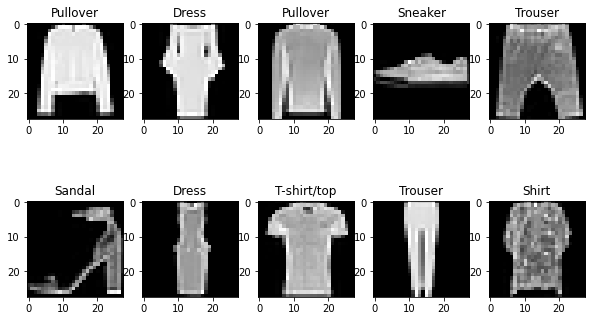

In [166]:
# display some images
plt.figure(figsize=(10, 6))

for i in range(0, 10):
  number = random.randint(0, 60000)
  plt.subplot(2, 5, i+1)
  plt.title(class_names[y_train[number]])
  plt.imshow(X_train[number], cmap = 'gray')
plt.show()

In [167]:
# check image shape
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)
y_train shape:  (60000,)
y_test shape:  (10000,)


In [168]:
# normalize the data
X_trainN = X_train.astype('float32') / 255
X_testN = X_test.astype('float32') /255

# reshape the data for the deep learning model
X_trainN = X_trainN.reshape((X_trainN.shape[0], 28, 28, 1))
X_testN = X_testN.reshape((X_testN.shape[0], 28, 28, 1))

In [169]:
print(X_testN.shape)
print(X_trainN.shape)

(10000, 28, 28, 1)
(60000, 28, 28, 1)


In [170]:
# one hot encode target values
y_trainC = keras.utils.to_categorical(y_train)
y_testC = keras.utils.to_categorical(y_test)

In [171]:
# define model

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Flatten())


model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [172]:
# compile model
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [173]:
# fit model
history = model.fit(X_trainN, y_trainC, batch_size = 4096, epochs=75, verbose = 2, validation_split = 0.25)

Epoch 1/75
11/11 - 4s - loss: 1.6771 - accuracy: 0.4157 - val_loss: 1.0565 - val_accuracy: 0.5716 - 4s/epoch - 322ms/step
Epoch 2/75
11/11 - 3s - loss: 1.0076 - accuracy: 0.6083 - val_loss: 0.8368 - val_accuracy: 0.6851 - 3s/epoch - 233ms/step
Epoch 3/75
11/11 - 3s - loss: 0.7786 - accuracy: 0.7120 - val_loss: 0.6727 - val_accuracy: 0.7459 - 3s/epoch - 235ms/step
Epoch 4/75
11/11 - 3s - loss: 0.6711 - accuracy: 0.7481 - val_loss: 0.6058 - val_accuracy: 0.7731 - 3s/epoch - 233ms/step
Epoch 5/75
11/11 - 3s - loss: 0.6047 - accuracy: 0.7734 - val_loss: 0.5575 - val_accuracy: 0.7847 - 3s/epoch - 233ms/step
Epoch 6/75
11/11 - 3s - loss: 0.5624 - accuracy: 0.7876 - val_loss: 0.5158 - val_accuracy: 0.8038 - 3s/epoch - 233ms/step
Epoch 7/75
11/11 - 3s - loss: 0.5251 - accuracy: 0.8050 - val_loss: 0.4847 - val_accuracy: 0.8175 - 3s/epoch - 234ms/step
Epoch 8/75
11/11 - 3s - loss: 0.4924 - accuracy: 0.8186 - val_loss: 0.4521 - val_accuracy: 0.8335 - 3s/epoch - 235ms/step
Epoch 9/75
11/11 - 3s - 

Text(0.5, 1.0, 'Train - Accuracy')

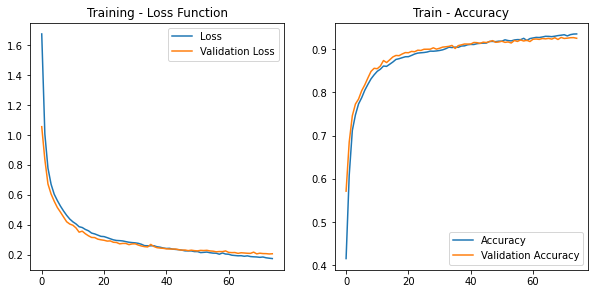

In [174]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [175]:
score = model.evaluate(X_testN, y_testC, verbose=2)
print('Test Loss',score[0])
print('Test Accuracy', score[1])

313/313 - 1s - loss: 0.2240 - accuracy: 0.9207 - 1s/epoch - 4ms/step
Test Loss 0.22396042943000793
Test Accuracy 0.9207000136375427
